In [1]:
import numpy as np
import matplotlib as plt
import pymc3 as pm
import pandas as pd
import pylab
import scipy.stats as stats
from scipy.stats import gamma
from scipy.stats import shapiro
from scipy.stats import skew
import arviz as az
import seaborn as sns
#Import repeat functions 
%run functions.ipynb

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#For building out this model initially I will only look at one company 
data = pd.read_csv('Remaining_Tickers.csv')
ticker = list(data['Ticker'])[12]
print(ticker)
dataframes = Pull_Data(ticker)
stock_data = dataframes[0]
vol_data = dataframes[1]
vol_data['Date'] = pd.to_datetime(vol_data['Date'],format = "%Y-%m-%d")
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format = "%Y-%m-%d")
result = stock_data.merge(vol_data,on='Date',how='inner')


result['HV_Target'] = result['Hv10'].shift(-1)
result['IV_Target'] = result['IvMean10'].shift(-1)

result.head()


#result.to_csv('Example_data.cvs')

GOOG


,Date,Close,Daily_Percent_Change,Volume,Hv10,Hv20,Hv30,Hv60,Hv90,Hv120,Hv150,Hv180,Phv10,Phv20,Phv30,Phv60,Phv90,Phv120,Phv150,Phv180,IvCall10,IvPut10,IvMean10,IvMeanSkew10,IvCall20,IvPut20,IvMean20,IvMeanSkew20,IvCall30,IvPut30,IvMean30,IvMeanSkew30,IvCall60,IvPut60,IvMean60,IvMeanSkew60,IvCall90,IvPut90,IvMean90,IvMeanSkew90,IvCall120,IvPut120,IvMean120,IvMeanSkew120,IvCall150,IvPut150,IvMean150,IvMeanSkew150,IvCall180,IvPut180,IvMean180,IvMeanSkew180,IvCall270,IvPut270,IvMean270,IvMeanSkew270,IvCall360,IvPut360,IvMean360,IvMeanSkew360,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080,updated,HV_Target,IV_Target
0,2016-01-04,37.091999,-0.022454,65456000,0.2583,0.2257,0.2114,0.2093,0.2423,0.2442,0.2947,0.3588,0.1422,0.1800,0.1948,0.1823,0.1884,0.1970,0.2296,0.2313,0.2405,0.2367,0.2386,0.0472,0.3075,0.3142,0.3108,0.0657,0.3571,0.3643,0.3607,0.0607,0.3088,0.3046,0.3067,0.0482,0.2897,0.2853,0.2875,0.0434,0.2829,0.2786,0.2808,0.0408,0.2761,0.2719,0.2740,0.0381,0.2734,0.2694,0.2714,0.0357,0.2762,0.2729,0.2745,0.0296,0.2790,0.2763,0.2776,0.0236,0.2794,0.2806,0.2800,0.0169,0.2794,0.2809,0.2802,0.0165,2023-02-02 21:39:53.309913+00:00,0.2506,0.2432
1,2016-01-05,37.129002,0.000998,39014000,0.2506,0.2148,0.2041,0.2068,0.2413,0.2427,0.2942,0.3584,0.1482,0.1651,0.1877,0.1828,0.1881,0.1973,0.2294,0.2318,0.2427,0.2437,0.2432,-0.0529,0.3273,0.3206,0.3239,0.0167,0.3649,0.3538,0.3594,0.0536,0.3072,0.3031,0.3051,0.0504,0.2899,0.2859,0.2879,0.0467,0.2857,0.2812,0.2834,0.0426,0.2814,0.2764,0.2789,0.0383,0.2798,0.2745,0.2772,0.0356,0.2811,0.2758,0.2784,0.0301,0.2824,0.2771,0.2798,0.0248,0.2833,0.2773,0.2803,0.0179,0.2833,0.2773,0.2803,0.0176,2023-02-02 21:39:53.309913+00:00,0.2510,0.2386
2,2016-01-06,37.181000,0.001400,38940000,0.2510,0.2135,0.1918,0.2066,0.2408,0.2400,0.2935,0.3578,0.1715,0.1691,0.1879,0.1854,0.1873,0.1979,0.2298,0.2324,0.2393,0.2380,0.2386,-0.0229,0.3425,0.3406,0.3416,0.0543,0.3647,0.3598,0.3622,0.0679,0.3082,0.3020,0.3051,0.0549,0.2921,0.2844,0.2882,0.0494,0.2866,0.2790,0.2828,0.0441,0.2812,0.2735,0.2774,0.0387,0.2794,0.2719,0.2756,0.0354,0.2814,0.2748,0.2781,0.0296,0.2835,0.2777,0.2806,0.0239,0.2813,0.2780,0.2796,0.0170,0.2811,0.2780,0.2796,0.0166,2023-02-02 21:39:53.309913+00:00,0.2399,0.2917
3,2016-01-07,36.319500,-0.023170,59274000,0.2399,0.2151,0.2062,0.2147,0.2460,0.2440,0.2960,0.3575,0.1858,0.1675,0.1923,0.1888,0.1866,0.1978,0.2305,0.2324,0.2799,0.3035,0.2917,0.0487,0.3908,0.4020,0.3964,0.0487,0.3900,0.3895,0.3898,0.0502,0.3252,0.3300,0.3276,0.0463,0.3073,0.3093,0.3083,0.0419,0.3005,0.3000,0.3002,0.0376,0.2938,0.2907,0.2922,0.0334,0.2913,0.2876,0.2894,0.0311,0.2913,0.2888,0.2901,0.0277,0.2913,0.2900,0.2906,0.0243,0.2890,0.2863,0.2876,0.0173,0.2888,0.2861,0.2874,0.0170,2023-02-02 21:39:53.309913+00:00,0.1655,0.2834
4,2016-01-08,35.723499,-0.016410,49018000,0.1655,0.2200,0.2119,0.2165,0.2486,0.2452,0.2904,0.3568,0.2017,0.1761,0.1988,0.1908,0.1886,0.1988,0.2301,0.2318,0.2843,0.2826,0.2834,-0.0268,0.4268,0.4216,0.4242,0.0730,0.3955,0.3901,0.3928,0.0614,0.3335,0.3284,0.3310,0.0556,0.3156,0.3093,0.3124,0.0487,0.3076,0.3003,0.3040,0.0422,0.2997,0.2913,0.2955,0.0357,0.2968,0.2885,0.2926,0.0325,0.2961,0.2897,0.2929,0.0278,0.2954,0.2908,0.2931,0.0231,0.2911,0.2878,0.2894,0.0170,0.2908,0.2876,0.2892,0.0168,2023-02-02 21:39:53.309913+00:00,0.1852,0.2570


# Gamma with Uniform and Exponential priors

In [3]:
model = pm.Model()

with model:
    
    # Priors
    alpha = pm.Uniform('alpha',0,1)
    beta = pm.Exponential('beta',1)
    
    # Data container class that wraps the theano SharedVariable class 
    
    data = pm.Data('Data', np.array(result.head(50)['Hv10']))
    
    # Likelihood
    
    Obs_HV = pm.Gamma('Obs_HV',alpha,beta,observed=data)
    trace = pm.sample(1000)

print(trace['alpha'])
print(trace['beta'])    

C:\Users\rjk13\AppData\Roaming\Python\Python310\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.


[0.9674449  0.91784766 0.99486299 ... 0.97941889 0.98495638 0.9979803 ]
[3.6950738  3.79271044 2.30722185 ... 3.24834615 2.96709341 3.13980385]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.96,0.04,0.89,1.00,0.00,0.00,1706.17,1762.95,1.0
beta,3.22,0.50,2.28,4.11,0.01,0.01,2049.80,1376.42,1.0


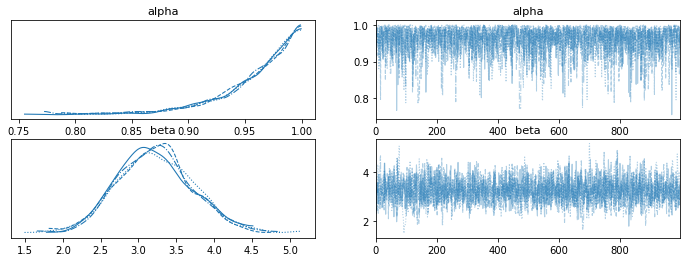

In [4]:
# Display the results from the parameter estimation

with model:
    az.plot_trace(trace);
    
with model:
    display(az.summary(trace, round_to=2))


 The mean of the predicted Postier Distribution is 0.30581859900279146
 The mode of the predicted Postier Distribution is {'alpha_interval__': array(15.94684348), 'beta_log__': array(1.18945535), 'alpha': array(0.99999988), 'beta': array(3.28529139)}
 The value I am trying to predict/capture is 0.135
 The Current Value of Historical Volatility is 0.2251


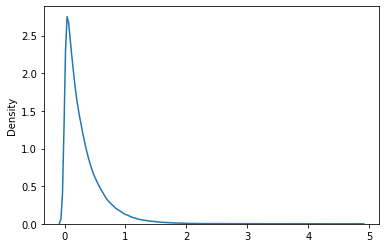

In [5]:
#Here I am sampling from the posterior of Historical Volatility

with model:
    post_pred = pm.sample_posterior_predictive(trace)
    
sample_post_pred = post_pred['Obs_HV']
map_estimate = pm.find_MAP(model=model)
print(F" The mean of the predicted Postier Distribution is {sample_post_pred.mean()}")
print(F" The mode of the predicted Postier Distribution is {map_estimate}")
flattened_post_pred = [y for x in sample_post_pred for y in x]
#sns.kdeplot(data=sample_post_pred)
sns.kdeplot(data=flattened_post_pred)

#For this example here is the row I am trying to predict

print(f" The value I am trying to predict/capture is {result.iloc[49]['HV_Target']}")
print(f" The Current Value of Historical Volatility is {result.iloc[49]['Hv10']}")

# Gamma with Uniform priors

In [92]:
model2 = pm.Model()

with model2:
    
    # Priors
    alpha = pm.Uniform('alpha',0,1)
    beta = pm.Uniform('beta',0,1)
    
    # Data container class that wraps the theano SharedVariable class 
    
    data = pm.Data('Data', np.array(result.head(50)['Hv10']))
    
    # Likelihood
    
    Obs_HV = pm.Gamma('Obs_HV',alpha,beta,observed=data)
    trace2 = pm.sample(1000)

print(trace2['alpha'])
print(trace2['beta'])  

C:\Users\rjk13\AppData\Roaming\Python\Python310\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
The acceptance probability does not match the target. It is 0.8819362751954771, but should be close to 0.8. Try to increase the number of tuning steps.


[0.55100639 0.72397162 0.72393752 ... 0.71705524 0.70996907 0.6397841 ]
[0.9994598  0.99981852 0.98767242 ... 0.93074666 0.97791468 0.81894502]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.66,0.09,0.50,0.82,0.0,0.0,1852.93,1333.14,1.0
beta,0.95,0.04,0.87,1.00,0.0,0.0,1828.80,1532.59,1.0


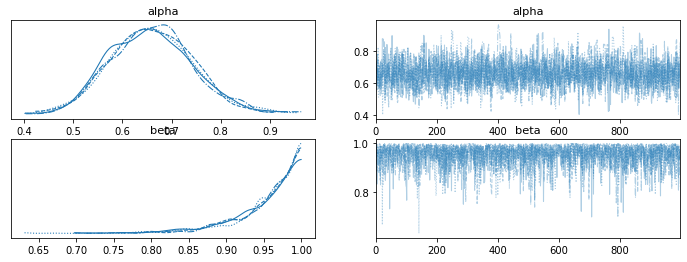

In [93]:
# Display the results from the parameter estimation

with model2:
    az.plot_trace(trace2);
    
with model2:
    display(az.summary(trace2, round_to=2))


 The mean of the predicted Postier Distribution is 0.6909277866187196
 The mode of the predicted Postier Distribution is {'alpha_interval__': array(0.716509), 'beta_interval__': array(14.87690936), 'alpha': array(0.67183781), 'beta': array(0.99999965)}
 The value I am trying to predict/capture is 0.135
 The Current Value of Historical Volatility is 0.2251


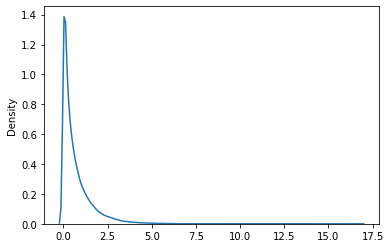

In [94]:
#Here I am sampling from the posterior of Historical Volatility

with model2:
    post_pred = pm.sample_posterior_predictive(trace2)
    
sample_post_pred = post_pred['Obs_HV']
map_estimate = pm.find_MAP(model=model2)
print(F" The mean of the predicted Postier Distribution is {sample_post_pred.mean()}")
print(F" The mode of the predicted Postier Distribution is {map_estimate}")
flattened_post_pred = [y for x in sample_post_pred for y in x]
#sns.kdeplot(data=sample_post_pred)
sns.kdeplot(data=flattened_post_pred)

#For this example here is the row I am trying to predict

print(f" The value I am trying to predict/capture is {result.iloc[49]['HV_Target']}")
print(f" The Current Value of Historical Volatility is {result.iloc[49]['Hv10']}")

# Gamma with Exponential priors

In [95]:
model3 = pm.Model()

with model3:
    
    # Priors
    alpha = pm.Exponential('alpha',1)
    beta = pm.Exponential('beta',1)
    
    # Data container class that wraps the theano SharedVariable class 
    
    data = pm.Data('Data', np.array(result.head(50)['Hv10']))
    
    # Likelihood
    
    Obs_HV = pm.Gamma('Obs_HV',alpha,beta,observed=data)
    trace3 = pm.sample(1000)

print(trace3['alpha'])
print(trace3['beta'])  

C:\Users\rjk13\AppData\Roaming\Python\Python310\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 61 seconds.
The number of effective samples is smaller than 25% for some parameters.


[3.01969086 3.24744262 3.49638984 ... 5.45427999 5.57553462 5.4928892 ]
[10.70571904 10.55715081 11.38063547 ... 19.15049528 18.85570654
 18.8132167 ]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,4.16,0.81,2.63,5.56,0.03,0.02,668.94,592.33,1.01
beta,13.79,2.88,8.55,19.01,0.11,0.08,725.41,726.27,1.01


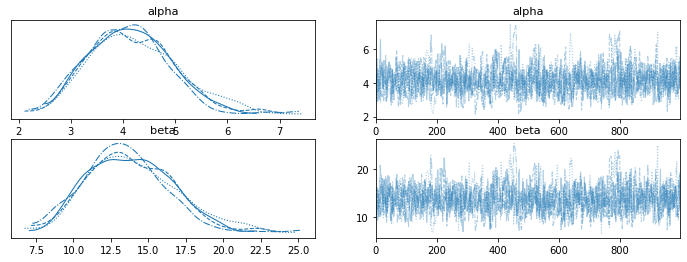

In [96]:
# Display the results from the parameter estimation

with model3:
    az.plot_trace(trace3);
    
with model3:
    display(az.summary(trace3, round_to=2))


 The mean of the predicted Postier Distribution is 0.30316583250360074
 The mode of the predicted Postier Distribution is {'alpha_log__': array(1.36529703), 'beta_log__': array(2.55473596), 'alpha': array(3.9168863), 'beta': array(12.86790156)}
 The value I am trying to predict/capture is 0.135
 The Current Value of Historical Volatility is 0.2251


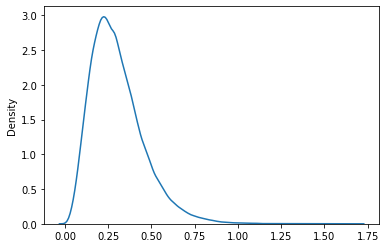

In [97]:
#Here I am sampling from the posterior of Historical Volatility

with model3:
    post_pred = pm.sample_posterior_predictive(trace3)
    
sample_post_pred = post_pred['Obs_HV']
map_estimate = pm.find_MAP(model=model3)
print(F" The mean of the predicted Postier Distribution is {sample_post_pred.mean()}")
print(F" The mode of the predicted Postier Distribution is {map_estimate}")
flattened_post_pred = [y for x in sample_post_pred for y in x]
#sns.kdeplot(data=sample_post_pred)
sns.kdeplot(data=flattened_post_pred)

#For this example here is the row I am trying to predict

print(f" The value I am trying to predict/capture is {result.iloc[49]['HV_Target']}")
print(f" The Current Value of Historical Volatility is {result.iloc[49]['Hv10']}")

# Log Normal with Uniform and Exponential priors

In [103]:
model4 = pm.Model()

with model4:
    
    # Priors
    mu = pm.Uniform('mu',0,1)
    sigma = pm.Exponential('sigma',1)
    
    # Data container class that wraps the theano SharedVariable class 
    
    data = pm.Data('Data', np.array(result.head(50)['Hv10']))
    
    # Likelihood
    
    Obs_HV = pm.LogNormal('Obs_HV',mu,sigma,observed=data)
    trace4 = pm.sample(1000)

print(trace4['mu'])
print(trace4['sigma'])  

C:\Users\rjk13\AppData\Roaming\Python\Python310\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\rjk13\AppData\Roaming\Python\Python310\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


[0.06901183 0.06957316 0.01535125 ... 0.00063291 0.13748095 0.04477571]
[1.42618882 1.48688297 1.36841408 ... 1.3161259  1.4062157  1.48238974]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.03,0.03,0.00,0.08,0.0,0.0,2129.75,1667.80,1.0
sigma,1.38,0.15,1.14,1.68,0.0,0.0,2020.80,1909.13,1.0


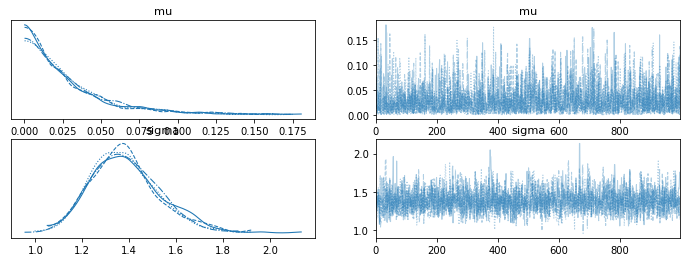

In [104]:
# Display the results from the parameter estimation

with model4:
    az.plot_trace(trace4);
    
with model4:
    display(az.summary(trace4, round_to=2))

C:\Users\rjk13\AppData\Roaming\Python\Python310\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)



 The mean of the predicted Postier Distribution is 2.782758602782756
 The mode of the predicted Postier Distribution is {'mu_interval__': array(-19.41948291), 'sigma_log__': array(0.27651605), 'mu': array(3.68320362e-09), 'sigma': array(1.31852812)}
 The value I am trying to predict/capture is 0.135
 The Current Value of Historical Volatility is 0.2251


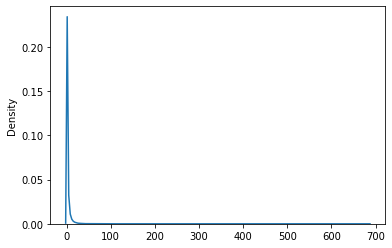

In [105]:
#Here I am sampling from the posterior of Historical Volatility

with model4:
    post_pred = pm.sample_posterior_predictive(trace4)
    
sample_post_pred = post_pred['Obs_HV']
map_estimate = pm.find_MAP(model=model4)
print(F" The mean of the predicted Postier Distribution is {sample_post_pred.mean()}")
print(F" The mode of the predicted Postier Distribution is {map_estimate}")
flattened_post_pred = [y for x in sample_post_pred for y in x]
#sns.kdeplot(data=sample_post_pred)
sns.kdeplot(data=flattened_post_pred)

#For this example here is the row I am trying to predict

print(f" The value I am trying to predict/capture is {result.iloc[49]['HV_Target']}")
print(f" The Current Value of Historical Volatility is {result.iloc[49]['Hv10']}")